<a href="https://colab.research.google.com/github/springsnowdrop/202206_technical_assignment_dsde/blob/master/YanWeigang_Rabo_MCD_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O label_raw.csv 'https://docs.google.com/uc?export=download&id=1cp5YFvszZuFw3IusD6EWKfL8AeCSf9Lg' -q --show-progress
!wget -O features.zip 'https://docs.google.com/uc?export=download&id=1BawB1Zm43rmk7HMftFWnwizN-cyd7nnD' -q --show-progress
!unzip features.zip
!ls

label_raw.csv       100%[===================>] 937.80K  --.-KB/s    in 0.007s  
features.zip        100%[===================>]   2.03M  --.-KB/s    in 0.02s   
Archive:  features.zip
  inflating: features.xlsx           
features.xlsx  features.zip  label_raw.csv  sample_data


In [ ]:
#data preparation and define classifiers
#For downloading relevant stocks and commodity data 
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 24.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#obtain, clean and understand data
#import packages and libraries

import pandas as pd
import numpy as np


MCD_label = pd.read_csv('/content/label_raw.csv')
MCD_label
feature_GDP = pd.read_excel('/content/features.xlsx',sheet_name='Worldbank_GDPcurrent')
feature_GDP
feature_exports = pd.read_excel('/content/features.xlsx',sheet_name='CensusUs_Exports')
feature_imports = pd.read_excel('/content/features.xlsx',sheet_name='CensusUs_Imports')
feature_retail = pd.read_excel('/content/features.xlsx',sheet_name='CensusUs_MonthlyRetailTrade')
feature_livestock = pd.read_excel('/content/features.xlsx',sheet_name='Usda_LivestockPrices')
feature_Meat = pd.read_excel('/content/features.xlsx',sheet_name='Usda_ErsMeatPriceSpreads')


In [ ]:
MCD =pd.DataFrame(MCD_label)
MCD['Date'] = pd.to_datetime(MCD['Date'])
MCD.info()
MCD.set_index('Date', inplace=True, drop=True)
MCD.sort_index(ascending = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13728 entries, 0 to 13727
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          13728 non-null  datetime64[ns]
 1   Open          13728 non-null  float64       
 2   High          13728 non-null  float64       
 3   Low           13728 non-null  float64       
 4   Close         13728 non-null  float64       
 5   Volume        13728 non-null  int64         
 6   Dividends     13728 non-null  float64       
 7   Stock Splits  13728 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 858.1 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1966-07-05,0.000000,0.004074,0.003982,0.004013,388800,0.0,0.0
1966-07-06,0.000000,0.004227,0.003982,0.004227,687200,0.0,0.0
1966-07-07,0.000000,0.004335,0.004044,0.004074,1853600,0.0,0.0
1966-07-08,0.000000,0.004120,0.003982,0.004120,1238400,0.0,0.0
1966-07-11,0.000000,0.004227,0.004059,0.004105,655200,0.0,0.0
...,...,...,...,...,...,...,...
2021-01-11,215.089996,216.119995,213.119995,214.229996,2545900,0.0,0.0
2021-01-12,213.690002,214.330002,210.940002,211.600006,2952000,0.0,0.0
2021-01-13,210.910004,213.130005,210.899994,212.089996,2069800,0.0,0.0


In [ ]:
#label the classifiers as buy, hold or sell
MCD_Decision = MCD.pct_change().apply(lambda x: x*100)

def class_creation(df, thres=10):
  """
  Creates classes of :
  -buy(1)
  -hold(2)
  -sell(0)

  Threshold can be changed to fit whatever price percentage change is desired
  """
  if df['High'] >= thres and df['Low'] >= thres:
    #Buys
    return 1
  
  elif df['High'] <= thres and df['Low'] <= thres:
    #Sells
    return 0
  
  else:
    # Holds
    return -1

MCD_Decision.info()

MCD_Decision

#MCD_Decision2 = MCD_Decision[['High','Low','Close']]
MCD_Decision.fillna(0, inplace=True)
#MCD_Decision2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13728 entries, 1966-07-05 to 2021-01-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          12876 non-null  float64
 1   High          13727 non-null  float64
 2   Low           13727 non-null  float64
 3   Close         13727 non-null  float64
 4   Volume        13727 non-null  float64
 5   Dividends     374 non-null    float64
 6   Stock Splits  18 non-null     float64
dtypes: float64(7)
memory usage: 858.0 KB


In [ ]:
MCD_Decision['Decision'] = MCD_Decision.apply(class_creation,axis=1).shift(-1)
MCD_Decision
#MCD_Decision.to_csv('MCD_Decision.csv')
#print(MCD_Decision)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Decision
Date,,,,,,,,
1966-07-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1966-07-06,0.000000,3.759442,0.000025,5.343538,76.748971,0.0,0.0,0.0
1966-07-07,0.000000,2.536173,1.538394,-3.623253,169.732247,0.0,0.0,0.0
1966-07-08,0.000000,-4.946977,-1.515135,1.127850,-33.189469,0.0,0.0,0.0
1966-07-11,0.000000,2.602244,1.923087,-0.371725,-47.093023,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-01-11,1.028653,0.000000,0.419356,-0.759716,-3.483964,0.0,0.0,0.0
2021-01-12,-0.650888,-0.828240,-1.022894,-1.227648,15.951137,0.0,0.0,0.0
2021-01-13,-1.300949,-0.559883,-0.018967,0.231564,-29.884824,0.0,0.0,0.0


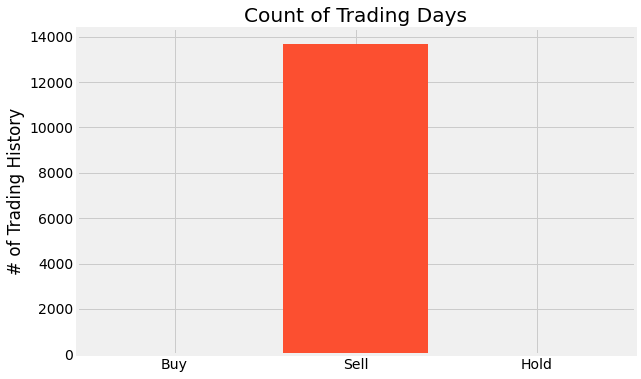

In [ ]:
#visualise the count of classes 

#import matplotlib.pyplot as plt

# Separating each class into respective DataFrames
buy_df = MCD_Decision[MCD_Decision['Decision']==1].loc[:, MCD_Decision.columns != 'Decision'].reset_index(drop=True)
hold_df = MCD_Decision[MCD_Decision['Decision']==2].loc[:, MCD_Decision.columns != 'Decision'].reset_index(drop=True)
sell_df = MCD_Decision[MCD_Decision['Decision']==0].loc[:, MCD_Decision.columns != 'Decision'].reset_index(drop=True)

# Visualizing in matplotlib
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

# Plotting the count of each DataFrame of each class
plt.bar("Buy", buy_df.shape[0])
plt.bar("Sell", sell_df.shape[0])
plt.bar("Hold", hold_df.shape[0])

plt.ylabel("# of Trading History")
plt.title('Count of Trading Days')
plt.show()

In [ ]:
#import yfinance and download commodity and stocks data 

#import yfinance as yf

livecattle = yf.download('LE=F', '1966-07-06','2021-01-16') #live cattle
livecattle

#data from multiple stocks relevant to vegetarism and waste management
# Define the ticker list
tickers_list = ['BYND', 'INGR', 'BG', 'AAK.ST', 'ADM', 'BIFF.L'] #Biffa(BIFF.L) is waste management stock

# Fetch the data
stockdata = yf.download(tickers_list,'1966-7-6','2021-01-16')

# Print first 5 rows of the data
print(stockdata.head())
print(stockdata.tail())
list(stockdata.columns.values)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
           Adj Close                                 Close                \
              AAK.ST       ADM  BG BIFF.L BYND INGR AAK.ST       ADM  BG   
Date                                                                       
1980-03-17       NaN  0.984437 NaN    NaN  NaN  NaN    NaN  1.848522 NaN   
1980-03-18       NaN  1.015903 NaN    NaN  NaN  NaN    NaN  1.907607 NaN   
1980-03-19       NaN  1.029389 NaN    NaN  NaN  NaN    NaN  1.932929 NaN   
1980-03-20       NaN  1.056360 NaN    NaN  NaN  NaN    NaN  1.983573 NaN   
1980-03-21       NaN  1.029389 NaN    NaN  NaN  NaN    NaN  1.932929 NaN   

                   ... Open                  Volume                        \
           BIFF.L  ...   BG BIFF.L BYND INGR AAK.ST        ADM  BG BIFF.L   
Date               ...                                                      
1980-03-17    NaN  ...

[('Adj Close', 'AAK.ST'),
 ('Adj Close', 'ADM'),
 ('Adj Close', 'BG'),
 ('Adj Close', 'BIFF.L'),
 ('Adj Close', 'BYND'),
 ('Adj Close', 'INGR'),
 ('Close', 'AAK.ST'),
 ('Close', 'ADM'),
 ('Close', 'BG'),
 ('Close', 'BIFF.L'),
 ('Close', 'BYND'),
 ('Close', 'INGR'),
 ('High', 'AAK.ST'),
 ('High', 'ADM'),
 ('High', 'BG'),
 ('High', 'BIFF.L'),
 ('High', 'BYND'),
 ('High', 'INGR'),
 ('Low', 'AAK.ST'),
 ('Low', 'ADM'),
 ('Low', 'BG'),
 ('Low', 'BIFF.L'),
 ('Low', 'BYND'),
 ('Low', 'INGR'),
 ('Open', 'AAK.ST'),
 ('Open', 'ADM'),
 ('Open', 'BG'),
 ('Open', 'BIFF.L'),
 ('Open', 'BYND'),
 ('Open', 'INGR'),
 ('Volume', 'AAK.ST'),
 ('Volume', 'ADM'),
 ('Volume', 'BG'),
 ('Volume', 'BIFF.L'),
 ('Volume', 'BYND'),
 ('Volume', 'INGR')]

In [ ]:
#combine the commodity and stocks data into one data frame
stocks = stockdata[[('Adj Close','AAK.ST'),('Adj Close','ADM'),('Adj Close','BG'),('Adj Close','BYND'),('Adj Close','BIFF.L'),('Adj Close','INGR')]].copy()
stocks.columns =  [c[0] + "_" + c[1] for c in stocks.columns]

livecattle_price = livecattle[['Adj Close']].copy()
livecattle_price = livecattle_price.rename(columns={"Adj Close":"AdjClose_cattle"})

#merge stocks and commodity
Final_Stocks = stocks.merge(livecattle_price,on = 'Date', how = 'left')

#select retail as a feature
feature_retail1= feature_retail.query("Kind_of_Business=='Retail and food services sales, total'and type=='ADJUSTED'")

feature_retail1 = feature_retail1[['rec_vld_dts','value']].copy()
feature_retail1 = feature_retail1.rename(columns={"rec_vld_dts":"Date"})
feature_retail1 = feature_retail1.rename(columns={"value":"retailvalue"})

feature_retail1['Date'] = pd.to_datetime(feature_retail1['Date'])
feature_retail1.info()
feature_retail1.set_index('Date', inplace=True, drop=True)
feature_retail1.sort_index(ascending = True)
feature_retail1
Features = Final_Stocks.merge(feature_retail1,on = 'Date', how = 'left')
Features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 690 to 4833
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         346 non-null    datetime64[ns]
 1   retailvalue  346 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.1 KB


,Adj Close_AAK.ST,Adj Close_ADM,Adj Close_BG,Adj Close_BYND,Adj Close_BIFF.L,Adj Close_INGR,AdjClose_cattle,retailvalue
Date,,,,,,,,
1980-03-17,NaN,0.984437,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,NaN,1.015903,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,NaN,1.029389,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,NaN,1.056360,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,NaN,1.029389,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-11,162.615555,50.309959,67.382446,116.639999,237.547516,76.612892,113.400002,NaN
2021-01-12,159.551010,49.691231,67.353447,120.510002,237.050552,76.564644,112.474998,NaN
2021-01-13,158.091705,50.048939,68.068634,125.349998,236.553589,76.062836,112.250000,NaN


In [ ]:
#drop columns which are not relevant to modelling 
Final_MCD=MCD.drop(['Open','High','Low'], axis=1)
#merge stocks and commodities
Final_MCD = Final_MCD.merge(Features, on = 'Date', how = "left") 
#merge classifiers(labels)
Final_MCD = Final_MCD.merge(MCD_Decision['Decision'], on = 'Date', how = "left")
#remove the forst row and last row as their labels are not valid
Final_MCD = Final_MCD[1:-1]
#replace NaN with 0
Final_MCD = Final_MCD.fillna(0)
Final_MCD

,Close,Volume,Dividends,Stock Splits,Adj Close_AAK.ST,Adj Close_ADM,Adj Close_BG,Adj Close_BYND,Adj Close_BIFF.L,Adj Close_INGR,AdjClose_cattle,retailvalue,Decision
Date,,,,,,,,,,,,,
1966-07-06,0.004227,687200,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1966-07-07,0.004074,1853600,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1966-07-08,0.004120,1238400,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1966-07-11,0.004105,655200,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1966-07-12,0.004044,298400,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,215.869995,2637800,0.0,0.0,163.442505,50.822338,67.846352,118.099998,242.020172,77.606865,114.474998,0.0,0.0
2021-01-11,214.229996,2545900,0.0,0.0,162.615555,50.309959,67.382446,116.639999,237.547516,76.612892,113.400002,0.0,0.0
2021-01-12,211.600006,2952000,0.0,0.0,159.551010,49.691231,67.353447,120.510002,237.050552,76.564644,112.474998,0.0,0.0


In [ ]:
#Step 2: set up neural network for predictive model
import keras

from keras import layers,optimizers, regularizers
from keras.layers import Dense, Dropout,BatchNormalization, Activation
from keras.models import Sequential

#from keras.utils import plot_model
import keras.backend as K

import seaborn as sns

from sklearn import preprocessing,model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# split into input (X) and output (y) variables
X0 = Final_MCD.iloc[:,0:12]
y = Final_MCD.iloc[:,12:]

X = preprocessing.normalize(X0, axis = 0)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

#standardize the dataset
#sc = StandardScaler()
#sc.fit(Xtrain)
#Xtrain = sc.transform(Xtrain)
#Xtest = sc.transform(Xtest)

# define the keras model
MCD_model = Sequential()
MCD_model.add(Dense(12, input_shape=(12,), activation='relu'))
MCD_model.add(Dense(8, activation='relu'))
MCD_model.add(Dense(1, activation='sigmoid'))

# compile the keras model
MCD_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
MCD_model.fit(X, y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = MCD_model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
1373/1373 [==============================] - 7s 5ms/step - loss: 0.1103 - accuracy: 0.9961
Epoch 2/150
1373/1373 [==============================] - 3s 2ms/step - loss: 6.3886e-04 - accuracy: 0.9975
Epoch 3/150
1373/1373 [==============================] - 3s 2ms/step - loss: -8.1040e-05 - accuracy: 0.9975
Epoch 4/150
1373/1373 [==============================] - 2s 2ms/step - loss: -3.7821e-04 - accuracy: 0.9975
Epoch 5/150
1373/1373 [==============================] - 3s 2ms/step - loss: -4.7498e-04 - accuracy: 0.9975
Epoch 6/150
1373/1373 [==============================] - 3s 2ms/step - loss: -5.5430e-04 - accuracy: 0.9975
Epoch 7/150
1373/1373 [==============================] - 2s 2ms/step - loss: -5.6032e-04 - accuracy: 0.9975
Epoch 8/150
1373/1373 [==============================] - 3s 2ms/step - loss: -6.4656e-04 - accuracy: 0.9975
Epoch 9/150
1373/1373 [==============================] - 3s 2ms/step - loss: -6.1286e-04 - accuracy: 0.9975
Epoch 10/150
1373/1373 [==========

In [ ]:
#make class predition with the model
MCD_preds=(MCD_model.predict(X)>0.5).astype(int)
MCD_preds

#list the prediction
for i in range(len(X)):
    print(X[i],MCD_preds[i])

Streaming output truncated to the last 5000 lines.
[0.00259491 0.00779317 0.        ] [0]
[0.00256883 0.00440147 0.        ] [0]
[0.00259491 0.00890501 0.        ] [0]
[0.00255443 0.00601923 0.        ] [0]
[0.00263539 0.00639127 0.        ] [0]
[0.0026039  0.00592697 0.        ] [0]
[0.00252385 0.00787768 0.        ] [0]
[0.00250047 0.01299395 0.        ] [0]
[0.00247798 0.015762   0.        ] [0]
[0.0024501  0.00910947 0.        ] [0]
[0.00238354 0.01338055 0.        ] [0]
[0.00237275 0.00695257 0.        ] [0]
[0.00231788 0.00788353 0.        ] [0]
[0.00230709 0.0097836  0.        ] [0]
[0.00225852 0.01197706 0.        ] [0]
[0.00224862 0.00824497 0.        ] [0]
[0.00227561 0.00817233 0.        ] [0]
[0.0022783  0.00903383 0.        ] [0]
[0.00227381 0.00659699 0.        ] [0]
[0.00238264 0.00898667 0.        ] [0]
[0.00238804 0.00925015 0.        ] [0]
[0.00239613 0.00721636 0.        ] [0]
[0.00231968 0.00880231 0.        ] [0]
[0.00234666 0.00863394 0.        ] [0]
[0.00233857 0

In [ ]:
# summarize the first 10 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), MCD_preds[i], y[i]))

[6.401564347330262e-07, 0.001087471121719663, 0.0] => 0 (expected 0)
[6.169619484251506e-07, 0.002933260289900418, 0.0] => 0 (expected 0)
[6.239203548886001e-07, 0.001959726771154876, 0.0] => 0 (expected 0)
[6.216010879710733e-07, 0.0010368321870644981, 0.0] => 0 (expected 0)
[6.123235660178141e-07, 0.00047220806565941123, 0.0] => 0 (expected 0)
[6.100038448171356e-07, 0.0004608143053619992, 0.0] => 0 (expected 0)
[6.030457412091205e-07, 0.0005127192133835431, 0.0] => 0 (expected 0)
[5.937683706835786e-07, 0.0005886776153662902, 0.0] => 0 (expected 0)
[5.937683706835786e-07, 0.0009583418383489928, 0.0] => 0 (expected 0)
[5.844903944471678e-07, 0.0006507103103188669, 0.0] => 0 (expected 0)
